# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [216]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [217]:
# Number of houses in the dataset
total_houses = housing_prices.size

# Number of features in the dataset
total_features = int(housing_features.shape[1])

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer:** 
    Three significant features:
    
    RM (average number of rooms per dwelling):
    The price of the house depends on its size. The greater the number of rooms the bigger the house, hence the higher the price. Assumption is made that the room dimensions are relatively similar for most houses.
        
    PTRATIO (pupil-teacher ratio by town): 
    This ratio reflects the level of town developmemnt. The high ratio indicats the poor education infrastructure. Such areas are less attractive to live in. Hence the demand drops, pulling housing prices down.  
    Also low education level correlates with higher crime level, which makes the place unattractive again.  
    
    LSTAT (% lower status of the population):
    The areas for which LSTAT value is small can be rated as areas where well-established class live. Usually these places have best hospitals, schools, parks, they are more secure. People also consider to move into such areas to make certain connections and they are ready to pay a premium. On the other hand, areas for which LSTAT value is high can be considered as less atractive to live in due to the lack of infrastructure development. All these factors affect the price as they are important for buyers. 

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [218]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


In [219]:
import pandas as pd
feature_value = pd.DataFrame(CLIENT_FEATURES, columns = city_data.feature_names)
print feature_value

    CRIM   ZN  INDUS  CHAS    NOX     RM   AGE    DIS  RAD    TAX  PTRATIO  \
0  11.95  0.0   18.1     0  0.659  5.609  90.0  1.385   24  680.0     20.2   

        B  LSTAT  
0  332.09  12.13  


**Answer: **
RM = 5.609, 
PTRATIO = 20.2, 
LSTAT = 12.13

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [220]:
from sklearn import cross_validation

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, train_size = 0.7, random_state = 70)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: **
If model testing is carried out on the data used for training, the model will show good performance, which will not necessarily be the case on unseen data. The independent set of data is needed to prove prediction ability of the model. That is why the data is split into training and testing parts, the latter is not available for model at the stage of training. 

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [221]:
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **
What approach to use for the housing price prediction problem? Is it classification or regression? 
The goal of the model is not to classify the housing price. If the goal was classification, then a list of classes would be required. This approach makes prediction overcomplicated. On the contrary, the goal is to predict the housing price as close to actual value as it is possible. Technically speaking, find out how far off the model's prediction is from the real true vale. That is why regression metrics need be used to analyse the model's performance. 
Which of the two MSE and MAE to choose from? MSE is more sensitive to large errors than MAE as errors get squared. Both metrics MSE and MAE are appropriate for predicting housing prices and analyzing the total error. Let's choose MSE as preferable so that to be able to capture large errors.

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [222]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, parameters, cv=5, scoring = scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **
Grid search algorithm is the algorithm used to identify such parameters (called hyperparameters) of the estimator that ensure the best estimator performance. Grid search helps to ensure that the estimator does not overfit its data by tuning parameters on training set.

A search consist of five main components:

* an estimator – the model used for prediction

for this project: regressor = DecisionTreeRegressor()

* a parameter space – range of values from which parameters can be selected

for this project: parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

* a method for search candidates – common approaches to sampling search candidates in scikit-learn are GridSearchCV (consider all parameters combinations) and RandomizedSearchCV (sample a given number of candidates from a parameter space with a specified distribution).

for this project: GridSearchCV

* a cross-validation scheme – here, the number of subsets (folds) the training set is to be split into. How many folds are needed? If K is large then training sets are larger and testing sets are smaller. It means that the model is more accurate (small bias), but the variance tends to be large. The computational time is also large. If K is small then training sets are smaller and testing sets are larger. It means that the model is less accurate (larger bias), but model's variance is smaller. The computation time is not large. Given dataset has 506 houses. If cv value is left as default, namely cv = 3, then training sets consist of 67% of dataset with 338 data points, testing sets consist of 33% of dataset with 168 data points. Good testing could be done on a smaller set, so it is possible to make model more accurate by increasing the size of training sets. Thus value of K can be increased. Let's choose K = 5. In this case, the size of training sets is 405 points (80% of dataset), the size of testing sets is 101 points (20% of dataset). Such ratio 80%/20% ensures good accuracy with relatively not large variance. Hence,

for this project: cv=5

* a score function – by default, search uses tow score function: sklearn.metrics.accuracy_score for classification and sklearn.metrics.r2_score for regression (the case for scikit-learn package). For some applications other scoring functions are better choices. An alternative scoring function can be specified via the scoring parameter.

for this project: scoring_function = make_scorer(performance_metric, greater_is_better=False)

Search grid algorithm can be applicable to a variety of estimators for which all components can be specified. For some estimators default settings are enough, but for others some components need to be tuned.

GridSearch is computationally expensive when dealing with a large number of different paramenters and much bigger datasets. In such a case, two other techniques could be used instead. These are RandomizedSearchCV and train/validation/test split. 

References:

1. http://scikit-learn.org/stable/modules/grid_search.html#grid-search

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **
Cross-validation is the multistep procedure used for model evaluation. Cross-validation approach requires splitting the training dataset into subsets called folds. The basic step can be defined as follows: denoting K as number of subsets (folds), K-1 number of subsets are used as training data. When model is trained the metric is evaluated on Kth subset left (validation set). The procedure performs the basic step for each subset. The result metric is the average of metrics calculated on each validation set.

Cross-validation is used to minimise the risk of model overfitting. This risk presents as parameters for the model are chosen such that to improve model performance on testing set. Thus testing set affects parameters selection for the model trained on training set which may lead to poor performance on unseen data. Cross-validation smooth the influence of known dataset on model parameters as resulting metric is the average of metrics obtained from multiple subsets.

Grid search implies model evaluation on all possible combinations of parameters. Cross-validation is used for model evaluation for each set of parameters. As cross-validation gives more accurate model evaluation, it brings more accuracy in picking the right set of parameters. Hence the better predictor is found as a result.

References:

http://scikit-learn.org/stable/modules/cross_validation.html

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [223]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [224]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


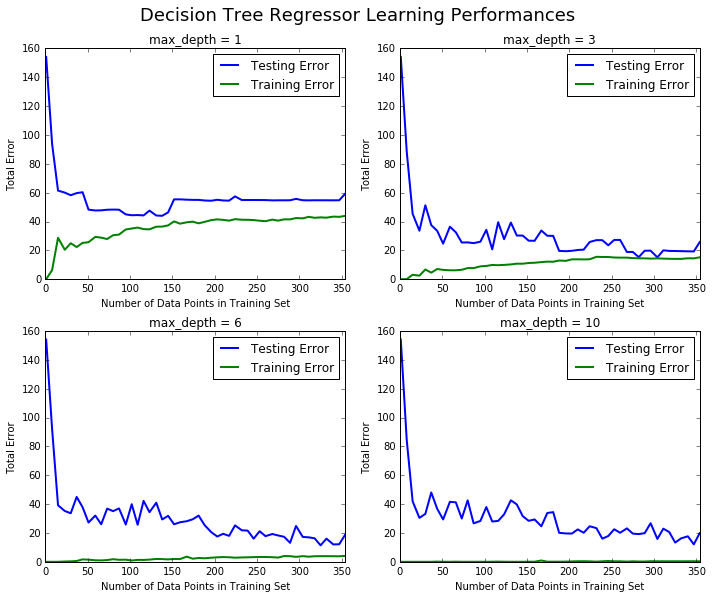

In [225]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*



**Answer: **
The graph for the model with max_depth = 3 is choosen. As the size of the training set increases, the training error increases moderately up to the size of approx 200 points (the error value is approx 18), stabilizing within the range of error values of 18-19. On the other hand, the testing error declines stabilizing at the point with set size of 270 points and testing error value of approx 28. Both training and testing errors are converging to approx value of 25.The difference between both errors when full data set is used is approx 10, indicating that model has moderate variance.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **
When model with max depth of 1 (let's name it 'model 1') uses the full training set, the testing erroe is approx 60 and training error is approx 45. As can be seen from the graph training and testing error converge quick. Model with max depth values of 3 performs with testing error of approx 28 and models with max depth being 6, 10 have testing error values of approx 20. Thus, model 1 performs much worse as training error is high even with large dataset. Therefore, conclusion can be made that model 1 suffers from high bias.

Let's look at model with max depth value of 10 ('model 10'). As mentioned, the testing error is good enough so the bias is not high. There is a big difference (approx 20) between testing and training error showing that error scatters from one dataset to another. Hence, model 10 suffers from high variance.

Creating a model complexity graph. . . 


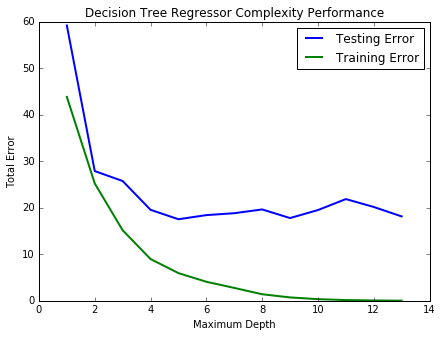

In [226]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **
    Training error declines exponentially as the max depth increases. As dataset stays the same, adding more features to the model makes it a good describer for current training dataset rather than a good predictor for general dataset. As seen from the graph, if all features are added to the model the training error is approx zero, but the testing error has the value of approx 20. Such a big difference indicates that this model has a high variance. Training error declines up to the point when max depth is 4 and stabilize afterwards at error value of 20. Such behaviour indicates that max depth greater than 4 is not going to improve the model performance. The difference between two errors at max depth of 3 and 4 is approx 10. The testing error is lower for max depth 4 with value of 20 as oppose to error value equal to 25 for model with max depth of 3. Thus, it is reasonable to choose max depth being equal to 4 so that to improve model accuracy.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [227]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 3


In [245]:
# code blocks run 13 times and statistics calculated for max_depth

max_depth = [3, 5, 7, 4, 7, 7, 3, 8, 3, 5, 5, 7, 3]
max_depth_median = np.median(np.array(max_depth))
max_depth_mean = np.mean(np.array(max_depth))

print "Median: %d \nMean: %0.1f" %(max_depth_median, max_depth_mean)

Median: 5 
Mean: 5.2


**Answer: **
Mean and median for max_depth parameter are 5 and 5.2 respectively. Thus the optimal max_depth parameter is 5. The initial parameter's value selected based on model complexity graph analysis is 4.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [228]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 22.905


In [248]:
# code blocks have run 13 times and statistics calculated for selling price

max_depth = [22.905, 20.968, 19.997, 21.630, 19.997, 19.997, 22.905, 18.817, 22.905, 20.968, 20.968, 19.997, 22.905]
max_depth_median = np.median(np.array(max_depth))
max_depth_mean = np.mean(np.array(max_depth))

print "Median: %0.3f \nMean: %0.3f" %(max_depth_median, max_depth_mean)

Median: 20.968 
Mean: 21.151


**Answer: **
The set of selling prices has no extreme values, hence mean can be used as final selling price. Thus, the best selling price is 21,151 USD. This price is 1,382 USD less than the mean housing price which is 22,533 USD. Also client's house cost 49 USD less than half of all houses considered (21,200 USD). Thus, it is enough evidence to say that client's house is the average house in Boston area.    

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **
The Greater Boston area consists of such cities as Providence, Worcester, Manchester, Cambridge and others. The relationships between choosen features and the selling price may be different across all cities. These differences (if exist) are not captured by the model built for Boston. That is why it would not be correct to use this model to predict the selling price of home in the Greater Boston area. The new dataset for the whole Greater Boston area is needed to predict the selling price of houses within the area.  